In [1]:
import pandas as pd
from data_analysis_codes import param
from data_analysis_codes.tools import PlottingTools as RPlot
from data_analysis_codes.tools import ReadingTools as RRead

def collect(p, zevars):
    pd = RPlot.getdata(p, zevars)
    e = RPlot.geterror_fromfile(p, 'h5', zevars)
    return {'param':p, 'data':pd, 'error':e}

In [2]:
Vars = ['gdet', 'drho', 'dK', 'dgdet', 'RicciS', 'ddrho', 'ddK', 'ddgdet', 'dRicciS']
locs = ['_OD', '_midOD', '_cent', '_UD', '_midUD', '_av']
zevars = [[v+l for l in locs] for v in Vars]
zevarsf = ['t']+[item for sublist in zevars for item in sublist]
Ps = [collect(param.pflrw_d3e2_L1821_t1_N128_LCDM(), zevarsf)]

P5 = [collect(param.pflrw_A1e5_L1821_t1_N128_LCDM(), zevarsf)]

In [3]:
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from matplotlib import gridspec
from data_analysis_codes.tools import LinData
import numpy as np
from mpl_toolkits.axes_grid.inset_locator import inset_axes

<ipython-input-3-e84ee1840ac9>:7: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


In [4]:
def pformat(p, pnbr):
    xlab = r'$a/a_{IN}$'
    ytfs=20
    #\;z_R=$'+str(p.zc)+p.sim_name
    titles={0:r'$\delta$', 1:r'$\delta \gamma$', 2:r'$\delta \Theta$', 3:r'$\;\;\;\;\;\;\;\;\;\; a^2{}^{(3)}R \;\; [\lambda_{pert}^{-2}]$', 4:'', 5:'', 6:'', 7:''}
    plt.title(titles[pnbr])
    plt.grid()
    plt.yticks(fontsize=ytfs)
    #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    if pnbr in [0, 1, 2, 3]:
        #plt.gca().set_xticklabels([])
        plt.xlabel(xlab)
        ymin, ymax = plt.gca().get_ylim()
        if pnbr in [0, 1, 2]:
            if ymin<-1:
                if pnbr in [0, 1]:
                    RPlot.redzone()
                elif pnbr==2:
                    plt.axhline(y=-1, c='brown', label='Turn around')
                    plt.text(1, -0.98, 'Turn around', c='brown')
                if ymax>0.5 and pnbr==2:
                    plt.axhline(y=0.5, c='brown', label='Milne model')
                    plt.text(1, 0.52, 'Milne model', c='brown')
        elif pnbr==3:
            #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
            plt.legend(fontsize=15)#, bbox_to_anchor=(1,1))
    elif pnbr in [4, 5, 6, 7]:
        plt.xlabel(xlab)
        if pnbr==4:
            plt.ylabel(r'$\delta/\delta^{(1)}-1$')#\langle\delta\rangle_{\mathcal{D}},\;\;
        

 read time file


<ipython-input-13-62187f82e735>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ins = plt.subplot(gs[2]).inset_axes([0.05,0.59,0.55,0.39])


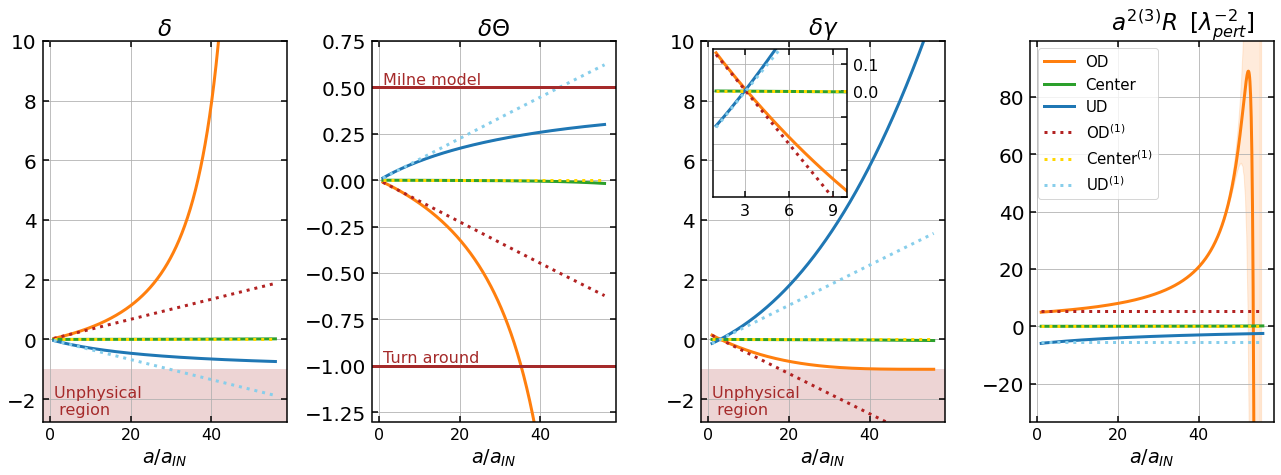

In [13]:
for P in Ps:
    param = RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')
    Lin = LinData.LinData_Class(param)
    #an_HC = ((p.c*Lin.a(Lin.t_today)**(3/2))/(p.L*Lin.H_today))**(2/5)/pd['a'][0]
    #print(an_HC)
    x = Lin.evo.a(P['data']['t'])
    x = x/x[0]
    
    plt.figure(figsize=(19, 7))
    gs = gridspec.GridSpec(1, 4)#, height_ratios=[2, 1]) 
    
    locs1 = ['OD', 'Center', 'UD']#, 'Average']
    locs2 = ['OD', 'Center', 'UD']
    
    plt.subplot(gs[0])
    RPlot.plot_locations(x, 'drho', P, locs=locs1)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.drho, locs=locs2)
    pformat(P['param'], 0)
    plt.ylim(-2.75, 10)
    #print(r'$\delta_{IN,OD}=$', P['pd']['drho_OD'][0])
    
    plt.subplot(gs[1])
    RPlot.plot_locations(x, 'dK', P, locs=locs1)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.dK, locs=locs2)
    pformat(P['param'], 2)
    plt.ylim(-1.3, 0.75)
    #A = len(P['pd']['dK_OD'])-1
    #print(P['pd']['dK_OD'][np.argmin(abs(P['pd']['dK_OD'][:A]+1))])
    #print(P['pd']['an'][np.argmin(abs(P['pd']['dK_OD'][:A]+1))])
    #print(P['pd']['an'][np.argmin(abs(P['pd']['dK_midOD'][:A]+1))])
            
    plt.subplot(gs[2])
    RPlot.plot_locations(x, 'dgdet', P, locs=locs1)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.dgdet, locs=locs2)
    pformat(P['param'], 1)
    plt.ylim(-2.75, 10)
    
    ins = plt.subplot(gs[2]).inset_axes([0.05,0.59,0.55,0.39])
    #inset_axes = inset_axes(plt.subplot(gs[1]), width="50%", # width = 30% of parent_bbox height=1.0, # height : 1 inch loc=1)
    #a = gs[1].axes([0.95, 0.5, 0.1, 0.2], facecolor='y')
    #rect = [0.2,0.2,0.7,0.7]
    #ax1 = add_subplot_axes(plt.subplot(gs[1]),rect)
    RPlot.plot_locations(x, 'dgdet', P, locs=locs1, ax=ins)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.dgdet, locs=locs2, ax=ins)
    ins.set_ylim(-0.4, 0.16)
    ins.set_xlim(0.8, 10)
    ins.set_yticks([-0.4, -0.3, -0.2, -0.1, 0, 0.1])#, .2, .4])
    ins.set_yticklabels(['', '', '', '', '0.0', '0.1'])
    ins.set_xticks([3, 6, 9])
    ins.grid()
    ins.yaxis.tick_right()
    
    plt.subplot(gs[3])
    RPlot.plot_locations(x, 'RicciS', P, ap=2, locs=locs1)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.dRicciS, a=Lin.evo.a(P['data']['t']), ap=2, locs=locs2)
    pformat(P['param'], 3)
    L = 1821
    plt.ylim(-0.00001*(L**2), 0.00003*(L**2))
    
    """plt.subplot(gs[4])
    RPlot.plot_locations(x, 'ddrho', P, pt='loglog', locs=locs2)
    pformat(P['p'], 4)
    
    plt.subplot(gs[5])
    RPlot.plot_locations(x, 'ddgdet', P, locs=locs2)
    pformat(P['p'], 5)
    
    plt.subplot(gs[6])
    RPlot.plot_locations(x, 'ddK', P, locs=locs2, pt='loglog')
    pformat(P['p'], 6)
    
    plt.subplot(gs[7])
    RPlot.plot_locations(x, 'dRicciS', P, pt='loglog', locs=locs2)
    pformat(P['p'], 7)"""
    
    plt.subplots_adjust(wspace=0.35, left=0.05, right=0.95)
    plt.savefig('/home/robynm/simulations/'+param['simname']+'/plots/Collapse_evolution_slide1.pdf')


In [6]:
def interpolate(f):
    f_save = [f[0]]
    for i in range(len(f)-1):
        f_save += [np.average([f[i], f[i+1]]), f[i+1]]
    return np.array(f_save)

def extrapolate(f):
    return np.append(f, f[-1]+f[-1]-f[-2])

def get_error(f32, f64, f128):
    f32 = interpolate(interpolate(f32))
    f64 = interpolate(f64)
    while len(f32)<len(f128):
        f32 = extrapolate(f32)
    while len(f64)<len(f128):
        f64 = extrapolate(f64)
    c = abs(f32-f64)/abs(f64-f128)
    err = abs((f64-f128)/(c-1))
    for ic in range(len(c)):
        if err[ic]>abs(f32[ic]-f64[ic]) or err[ic]>abs(f64[ic]-f128[ic]):
            err[ic] = np.max([abs(f32[ic]-f64[ic]), abs(f64[ic]-f128[ic])])
    return err

In [7]:
f32 = pd.read_table('/home/robynm/simulations/pflrw_d3e2_L1821_t1_N32_LCDM/h5_data.csv', delimiter=',')
f64 = pd.read_table('/home/robynm/simulations/pflrw_d3e2_L1821_t1_N64_LCDM/h5_data.csv', delimiter=',')

 read time file


<ipython-input-12-ff2a1fbcbd51>:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ins = plt.subplot(gs[2]).inset_axes([0.05,0.59,0.55,0.39])


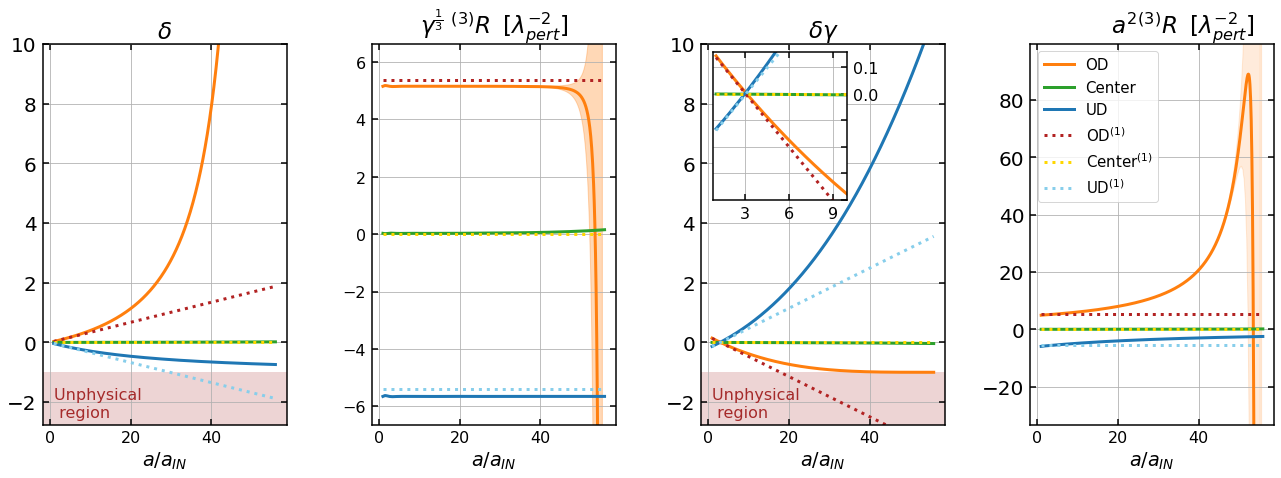

In [12]:
for P in Ps:
    param = RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')
    Lin = LinData.LinData_Class(param)
    #an_HC = ((p.c*Lin.a(Lin.t_today)**(3/2))/(p.L*Lin.H_today))**(2/5)/pd['a'][0]
    #print(an_HC)
    x = Lin.evo.a(P['data']['t'])
    x = x/x[0]
    
    plt.figure(figsize=(19, 7))
    gs = gridspec.GridSpec(1, 4)#, height_ratios=[2, 1]) 
    
    locs1 = ['OD', 'Center', 'UD']#, 'Average']
    locs2 = ['OD', 'Center', 'UD']
    
    plt.subplot(gs[0])
    RPlot.plot_locations(x, 'drho', P, locs=locs1)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.drho, locs=locs2)
    pformat(P['param'], 0)
    plt.ylim(-2.75, 10)
    #print(r'$\delta_{IN,OD}=$', P['pd']['drho_OD'][0])
    
    plt.subplot(gs[1])
    
    an = x
    L = 1821
    f = P['data']
    plt.plot(an, (f['gdet_OD']**(1/3))*f['RicciS_OD']*(L**2), color='C1', label='OD')
    plt.plot(an, (f['gdet_cent']**(1/3))*f['RicciS_cent']*(L**2), color='C2', label='cent')
    plt.plot(an, (f['gdet_UD']**(1/3))*f['RicciS_UD']*(L**2), color='C0', label='UD')

    err = get_error((f32['gdet_OD']**(1/3))*f32['RicciS_OD']*(L**2),
                    (f64['gdet_OD']**(1/3))*f64['RicciS_OD']*(L**2),
                    (f['gdet_OD']**(1/3))*f['RicciS_OD']*(L**2))
    plt.fill_between(an, (f['gdet_OD']**(1/3))*f['RicciS_OD']*(L**2)+err, 
                     (f['gdet_OD']**(1/3))*f['RicciS_OD']*(L**2)-err, facecolor='C1', edgecolor='C1', alpha=0.3)

    err = get_error((f32['gdet_cent']**(1/3))*f32['RicciS_cent']*(L**2),
                    (f64['gdet_cent']**(1/3))*f64['RicciS_cent']*(L**2),
                    (f['gdet_cent']**(1/3))*f['RicciS_cent']*(L**2))
    plt.fill_between(an, (f['gdet_cent']**(1/3))*f['RicciS_cent']*(L**2)+err, 
                     (f['gdet_cent']**(1/3))*f['RicciS_cent']*(L**2)-err, facecolor='C2', edgecolor='C2', alpha=0.3)

    err = get_error((f32['gdet_UD']**(1/3))*f32['RicciS_UD']*(L**2),
                    (f64['gdet_UD']**(1/3))*f64['RicciS_UD']*(L**2),
                    (f['gdet_UD']**(1/3))*f['RicciS_UD']*(L**2))
    plt.fill_between(an, (f['gdet_UD']**(1/3))*f['RicciS_UD']*(L**2)+err, 
                     (f['gdet_UD']**(1/3))*f['RicciS_UD']*(L**2)-err, facecolor='C0', edgecolor='C0', alpha=0.3)

    plt.plot(an, Lin.dRicciSconf(f['t'], loc='OD')*(L**2), linestyle=':', color='firebrick', label='OD'+r'${}^{(1)}$')
    plt.plot(an, Lin.dRicciSconf(f['t'], loc='cent')*(L**2), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
    plt.plot(an, Lin.dRicciSconf(f['t'], loc='UD')*(L**2), linestyle=':', color='skyblue', label='UD'+r'${}^{(1)}$')
    plt.grid()
    plt.ylim(-2e-6*(L**2), 2e-6*(L**2))
    plt.xlabel(r'$a/a_{IN}$')
    plt.title(r'$\gamma^{\frac{1}{3}} \; {}^{(3)}R \;\; [\lambda_{pert}^{-2}]$')
            
    plt.subplot(gs[2])
    RPlot.plot_locations(x, 'dgdet', P, locs=locs1)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.dgdet, locs=locs2)
    pformat(P['param'], 1)
    plt.ylim(-2.75, 10)
    
    ins = plt.subplot(gs[2]).inset_axes([0.05,0.59,0.55,0.39])
    #inset_axes = inset_axes(plt.subplot(gs[1]), width="50%", # width = 30% of parent_bbox height=1.0, # height : 1 inch loc=1)
    #a = gs[1].axes([0.95, 0.5, 0.1, 0.2], facecolor='y')
    #rect = [0.2,0.2,0.7,0.7]
    #ax1 = add_subplot_axes(plt.subplot(gs[1]),rect)
    RPlot.plot_locations(x, 'dgdet', P, locs=locs1, ax=ins)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.dgdet, locs=locs2, ax=ins)
    ins.set_ylim(-0.4, 0.16)
    ins.set_xlim(0.8, 10)
    ins.set_yticks([-0.4, -0.3, -0.2, -0.1, 0, 0.1])#, .2, .4])
    ins.set_yticklabels(['', '', '', '', '0.0', '0.1'])
    ins.set_xticks([3, 6, 9])
    ins.grid()
    ins.yaxis.tick_right()
    
    plt.subplot(gs[3])
    RPlot.plot_locations(x, 'RicciS', P, ap=2, locs=locs1)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.dRicciS, a=Lin.evo.a(P['data']['t']), ap=2, locs=locs2)
    pformat(P['param'], 3)
    L = 1821
    plt.ylim(-0.00001*(L**2), 0.00003*(L**2))
    
    """plt.subplot(gs[4])
    RPlot.plot_locations(x, 'ddrho', P, pt='loglog', locs=locs2)
    pformat(P['p'], 4)
    
    plt.subplot(gs[5])
    RPlot.plot_locations(x, 'ddgdet', P, locs=locs2)
    pformat(P['p'], 5)
    
    plt.subplot(gs[6])
    RPlot.plot_locations(x, 'ddK', P, locs=locs2, pt='loglog')
    pformat(P['p'], 6)
    
    plt.subplot(gs[7])
    RPlot.plot_locations(x, 'dRicciS', P, pt='loglog', locs=locs2)
    pformat(P['p'], 7)"""
    
    plt.subplots_adjust(wspace=0.35, left=0.05, right=0.95)
    plt.savefig('/home/robynm/simulations/'+param['simname']+'/plots/Collapse_evolution_slide2.pdf')


 read time file


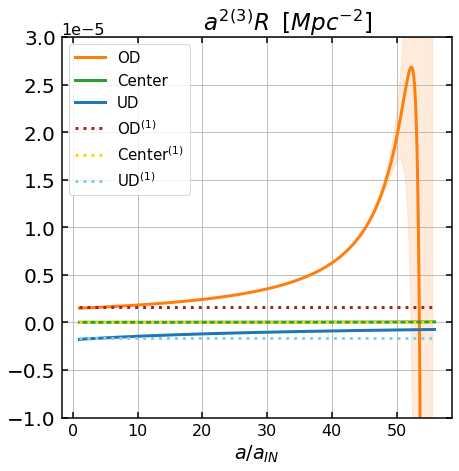

In [12]:
for P in Ps:
    Lin = LinData.LinData_Class(P['param'], '/home/robynm/simulations/'+P['param'].sim_name+'/')
    x = Lin.a(P['data']['t'])
    x = x/x[0]
    
    plt.figure(figsize=(7,7))
    
    RPlot.plot_locations(x, 'RicciS', P, ap=2, locs=locs1)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.dRicciS, a=Lin.a(P['data']['t']), ap=2, locs=locs2)
    pformat(P['param'], 3)
    plt.ylim(-0.00001, 0.00003)
    
    plt.savefig('/home/robynm/simulations/'+P['param'].sim_name+'/plots/Collapse_evolution_3R')
    

 read time file


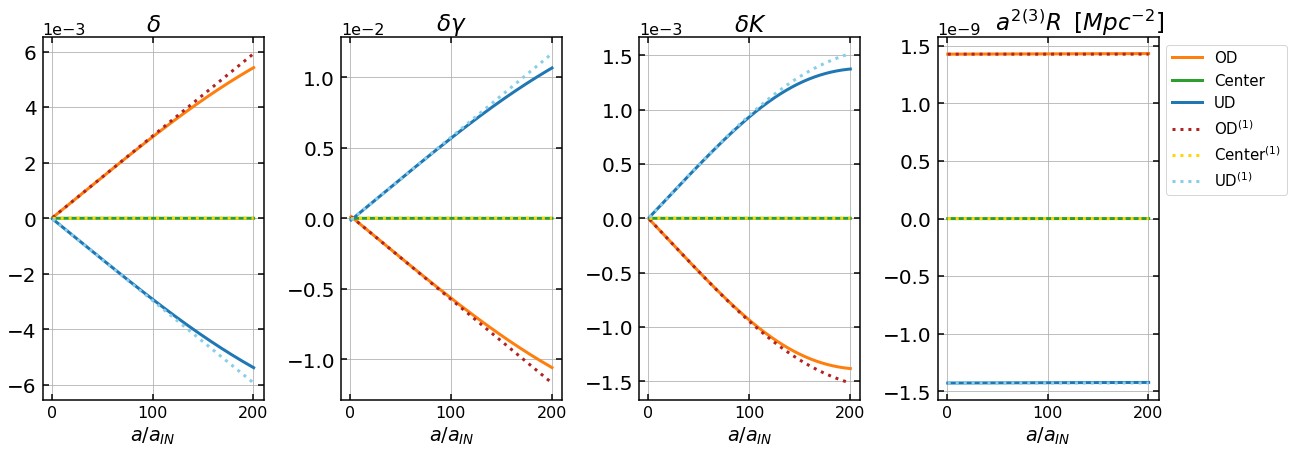

In [6]:
for P in P5:
    
    Lin = LinData.LinData_Class(P['param'], '/home/robynm/simulations/'+P['param'].sim_name+'/')
    #an_HC = ((p.c*Lin.a(Lin.t_today)**(3/2))/(p.L*Lin.H_today))**(2/5)/pd['a'][0]
    #print(an_HC)
    x = Lin.a(P['data']['t'])
    x = x/x[0]
    
    plt.figure(figsize=(20, 10))
    gs = gridspec.GridSpec(2, 4, height_ratios=[2, 1]) 
    
    locs1 = ['OD', 'Center', 'UD']#, 'Average']
    locs2 = ['OD', 'Center', 'UD']
    
    plt.subplot(gs[0])
    RPlot.plot_locations(x, 'drho', P, locs=locs1)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.drho, locs=locs2)
    pformat(P['param'], 0)
            
    plt.subplot(gs[1])
    RPlot.plot_locations(x, 'dgdet', P, locs=locs1)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.dgdet, locs=locs2)
    pformat(P['param'], 1)
    
    plt.subplot(gs[2])
    RPlot.plot_locations(x, 'dK', P, locs=locs1)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.dK, locs=locs2)
    pformat(P['param'], 2)
    
    plt.subplot(gs[3])
    RPlot.plot_locations(x, 'RicciS', P, ap=2, locs=locs1)
    RPlot.plot_locations_th(x, P['data']['t'], Lin.dRicciS, a=Lin.a(P['data']['t']), ap=2, locs=locs2)
    pformat(P['param'], 3)
    
    plt.subplots_adjust(hspace=0)
    plt.subplots_adjust(wspace=0.35)
    
    #plt.savefig('/home/robynm/simulations/'+P['param'].sim_name+'/Collapse_evolution')


In [7]:
print(r'$a/a_{IN}, \delta=, \delta=$')
for an in [1, 35.16,55.8]:
    print('{:.2f}, {:.5e}, {:.5e}'.format(an, an*P['pd']['drho_OD'][0], an*Lin.delta(P['p'].t_initial, loc='OD')))

$a/a_{IN}, \delta=, \delta=$


KeyError: 'pd'

In [ ]:
P['pd']['drho_cent'][0], Lin.delta(P['p'].t_initial, loc='cent'), Lin.delta_initial['cent']

In [ ]:
gxx = Lin.a_initial**2
gyy = Lin.a_initial**2
gzz = Lin.a_initial**2
gdet = gxx*gyy*gzz
gxxu = ( gyy*gzz ) / gdet
gyyu = ( gxx*gzz ) / gdet
gzzu = ( gxx*gyy ) / gdet

RicciS = 0
RicciSfull = 0

kxx = - Lin.a_initial**2 * Lin.Hprop_initial
kyy = - Lin.a_initial**2 * Lin.Hprop_initial
kzz = - Lin.a_initial**2 * Lin.Hprop_initial
K_L = gxxu*kxx + gyyu*kyy + gzzu*kzz
KijKji = gxxu*kxx*gxxu*kxx + gyyu*kyy*gyyu*kyy + gzzu*kzz*gzzu*kzz

rho_full = (RicciSfull + K_L**2 - KijKji - 2*Lin.Lambda_initial) / (2 * Lin.kappa)
rho_full/Lin.rho_initial - 1

In [ ]:
rho_full, Lin.rho_initial

In [ ]:
K_L**2, 9*Lin.Hprop_initial**2

In [ ]:
KijKji, 3*Lin.Hprop_initial**2

In [ ]:
Lin.Lambda_initial, (1-Lin.Omega_m_initial)*3*Lin.Hprop_initial**2